In [1]:
# Necessary imports

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from itertools import combinations



### Code for generating a cleaned/more usable dataset, most changes/modifications are described in the code comments

In [2]:
pd.set_option('display.max_columns', None)

# get the dataset as a dataframe 
df = pd.read_csv('MDS sample.csv')
# change dates into datetime datatypes
df['DATE_ASSESSMENT'] = pd.to_datetime(df['DATE_ASSESSMENT'], format='%d%b%Y', errors='coerce')
df['BENE_DEATH_DT'] = pd.to_datetime(df['BENE_DEATH_DT'], format='%d%b%Y',errors='coerce')
# change weight recordings of 0 into NaN
df['WT_OLD'] = df['WT_OLD'].replace(0, np.nan)
# sort the assessments of each person by the date
df_sorted = df.sort_values(by=['BENE_ID', 'DATE_ASSESSMENT'], ascending=[True, False]).reset_index(drop=True)



# convert the values in RACE column so that it shows the race instead of the corresponding number
race_map = {
    6: "Native Hawaiian/Pacific Islander",
    5: "American Indian/Alaskan Native",
    4: "Asian",
    3: "Black",
    2: "Hispanic",
    1: "White",
    0: "Missing"
}
df_sorted["RACE"] = df_sorted["RACE"].map(race_map)

#c onvert values in GENDER column to actual genders instead of A and B
gender_map = {
    'A': 'Male',
    'B': 'Female'
}
df_sorted["GENDER"] = df_sorted["GENDER"].map(gender_map)

#find row with earliest assessment for each patient
first_assessment = (df_sorted.sort_values(["BENE_ID", "DATE_ASSESSMENT"], ascending=[True, True])
    .groupby('BENE_ID', group_keys=False)
    .apply(lambda g: g.iloc[0])
    .reset_index(drop=True)
)
# drop under 66 years old
mask_age = first_assessment["AGE"] >= 66
# drop missing WT_OLD at first assessment
mask_wt_notna = first_assessment["WT_OLD"].notna()
# drop outside 1st–99th percentile in WT_OLD
low, high = first_assessment["WT_OLD"].quantile([0.01, 0.99])
mask_wt_range = first_assessment["WT_OLD"].between(low, high)
# drop BMI < 30
mask_bmi = first_assessment["BMI"] >= 30
# combine masks
valid_patients = first_assessment[mask_age & mask_wt_notna & mask_wt_range & mask_bmi]["BENE_ID"]
# keep only assessments for valid patients
df_sorted = df_sorted[df_sorted["BENE_ID"].isin(valid_patients)].copy()




df_sorted[df_sorted['BENE_ID'].str.contains('JJJJJJ4J4WVppzz')]
#df_sorted[df_sorted['BENE_ID'].str.contains('JJJJJJJM3zMz3oo')].sort_values(["BENE_ID", "DATE_ASSESSMENT"]).groupby("BENE_ID").first().reset_index()
#df_sorted[df_sorted['BENE_ID'].str.contains('JJJJJJJozWpzopV')]
#len(df_sorted)

/var/folders/0y/mmp_lnms4tx1tvdz0cwsqdx40000gs/T/ipykernel_43981/2362834362.py:4: DtypeWarning: Columns (41,43,44,46,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MDS sample.csv')
/var/folders/0y/mmp_lnms4tx1tvdz0cwsqdx40000gs/T/ipykernel_43981/2362834362.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.iloc[0])


,BENE_ID,DATE_ASSESSMENT,BENE_DEATH_DT,AGE,GENDER,RACE,ADL_SCORE,MOBILITY_SP1,COG_MS1,ARTHRITIS,STROKE,CANCER,COPD,DIAB,DEMENTIA,WT_OLD,BMI,DEPRESSION,HEARTFAILURE,HYPERTENSION,ESRD,FT_PROBLEM,HEARING,BOWEL_INCONTINENCE,URINE_INCONTINENCE,ANXTY,MNC_DPRSN,SCHZOPRNIA,BIMS,GG0130A1_EATG_ABILITY_STRT_CD,GG0130A2_EATG_GOAL_BY_END_CD,GG0130A3_EATG_ABILITY_END_CD,GG0130A5_SELF_CARE_EATG_CD,GG0130B1_ORAL_ABILITY_STRT_CD,GG0130B2_ORAL_GOAL_BY_END_CD,GG0130B3_ORAL_ABILITY_END_CD,GG0130B5_SELF_CARE_ORAL_CD,GG0130C1_TOILT_ABILITY_STRT_CD,GG0130C2_TOILT_GOAL_BY_END_CD,GG0130C3_TOILT_ABILITY_END_CD,GG0130C5_SELF_CARE_TOILTG_CD,GG0130E1_BTHE_SELF_STRT_CD,GG0130E2_BTHE_SELF_GOAL_CD,GG0130E3_BTHE_SELF_END_CD,GG0130F1_UPR_DRSNG_STRT_CD,GG0130F2_UPR_DRSNG_GOAL_CD,GG0130F3_UPR_DRSNG_END_CD,GG0130G1_LWR_DRSNG_STRT_CD,GG0130G2_LWR_DRSNG_GOAL_CD,GG0130G3_LWR_DRSNG_END_CD,PRESSURE_ULCER
360,JJJJJJ4J4WVppzz,2020-02-05,NaT,74,Male,White,11.0,1.0,NaN,NaN,NaN,NaN,COPD,Diabetes,NaN,104.779752,31.325810,Depression,Heart failure,Hypertension,NaN,Fall history,NaN,Bowel incontinence,Urinary incontinence,NaN,Manic depression,NaN,Cognitively intact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,JJJJJJ4J4WVppzz,2019-11-06,NaT,74,Male,White,7.0,1.0,NaN,NaN,NaN,NaN,COPD,Diabetes,NaN,101.604608,30.376543,Depression,Heart failure,Hypertension,NaN,Fall history,NaN,NaN,NaN,NaN,Manic depression,NaN,Cognitively intact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,JJJJJJ4J4WVppzz,2019-08-13,NaT,73,Male,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06,NaN,NaN,NaN,06,NaN,NaN,NaN,06,NaN,NaN,NaN,04,NaN,NaN,06,NaN,NaN,06,NaN
363,JJJJJJ4J4WVppzz,2019-08-11,NaT,73,Male,White,7.0,1.0,NaN,NaN,NaN,NaN,COPD,NaN,NaN,97.068688,29.020448,Depression,Heart failure,Hypertension,NaN,Fall history,NaN,NaN,Urinary incontinence,NaN,Manic depression,NaN,Cognitively intact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,JJJJJJ4J4WVppzz,2019-08-06,NaT,73,Male,White,7.0,1.0,NaN,NaN,NaN,NaN,COPD,NaN,NaN,97.068688,29.020448,Depression,Heart failure,Hypertension,NaN,Fall history,NaN,NaN,Urinary incontinence,NaN,Manic depression,NaN,Cognitively intact,06,06,NaN,NaN,06,06,NaN,NaN,04,06,NaN,NaN,04,04,NaN,06,06,NaN,04,06,NaN,NaN
365,JJJJJJ4J4WVppzz,2019-07-30,NaT,73,Male,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,JJJJJJ4J4WVppzz,2019-07-27,NaT,73,Male,White,7.0,1.0,0.0,NaN,NaN,NaN,NaN,Diabetes,NaN,101.151016,30.240934,NaN,Heart failure,NaN,NaN,NaN,NaN,NaN,Urinary incontinence,NaN,Manic depression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,JJJJJJ4J4WVppzz,2019-07-01,NaT,73,Male,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05,NaN,NaN,NaN,06,NaN,NaN,NaN,06,NaN,NaN,NaN,04,NaN,NaN,06,NaN,NaN,06,NaN
368,JJJJJJ4J4WVppzz,2019-06-23,NaT,73,Male,White,7.0,1.0,NaN,NaN,NaN,NaN,COPD,Diabetes,NaN,100.243832,29.969715,Depression,Heart failure,Hypertension,NaN,Fall history,NaN,NaN,NaN,NaN,Manic depression,NaN,Mildly impaired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,JJJJJJ4J4WVppzz,2019-06-09,NaT,73,Male,White,11.0,1.0,NaN,NaN,NaN,NaN,COPD,Diabetes,NaN,100.243832,29.969715,Depression,Heart failure,Hypertension,NaN,Fall history,NaN,Bowel incontinence,Urinary incontinence,NaN,Manic depression,NaN,Mildly impaired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA on GG0130 columns

- GG0130A. Eating: Ability to use utensils to bring food to the mouth and swallow.
- GG0130B. Oral Hygiene: Ability to clean teeth/dentures.
- GG0130C. Toileting Hygiene: Managing perineal hygiene and clothes before/after toilet/commode/bedpan.
- GG0130E. Shower/Bathe Self: Washing, rinsing, and drying the body, excluding back/hair.
- GG0130F. Upper Body Dressing: Dressing/undressing above the waist.
- GG0130G. Lower Body Dressing: Dressing/undressing below the waist, excluding footwear.
- GG0130H. Putting On/Taking Off Footwear: Managing socks/shoes.

- Code 6 (Independent): No assistance needed.
- Code 5 (Setup/Cleanup): Helper only prepares or cleans up.
- Code 4 (Supervision/Touching): Verbal cues or steadying assistance.
- Code 3 (Partial/Moderate): Helper provides < 50% effort.
- Code 2 (Substantial/Maximal): Helper provides > 50% effort.
- Code 1 (Dependent): Helper provides 100% of effort.
- Non-performance codes: 07 (Refused), 09 (Not applicable), 88 (Medical contraindication).

In [3]:
# find all unique values in each GG0130 column
gg0130_columns = [col for col in df_sorted.columns if col.startswith('GG0130')]
unique_values = {col: df_sorted[col].unique() for col in gg0130_columns
                    if df_sorted[col].notna().any()}
# print the unique values for each GG0130 column
for col, values in unique_values.items():
    print(f"{col}: {values}")

GG0130A1_EATG_ABILITY_STRT_CD: [nan '06' '05' '03' '02' '04' '09' '01' '88' '-']
GG0130A2_EATG_GOAL_BY_END_CD: [nan '06' '05' '-' '04' '02' '09' '03' '01' '88']
GG0130A3_EATG_ABILITY_END_CD: [nan '06' '05' '04' '02' '03' '01' '88']
GG0130A5_SELF_CARE_EATG_CD: [nan  5.  6.  3.]
GG0130B1_ORAL_ABILITY_STRT_CD: [nan '06' '05' '03' '04' '02' '09' '01' '-']
GG0130B2_ORAL_GOAL_BY_END_CD: [nan '06' '05' '04' '09' '-' '02' '03' '01']
GG0130B3_ORAL_ABILITY_END_CD: [nan '06' '05' '04' '02' '03' '01']
GG0130B5_SELF_CARE_ORAL_CD: [nan  5.  3.  2.  6.  4.]
GG0130C1_TOILT_ABILITY_STRT_CD: [nan '04' '03' '06' '05' '02' '01' '09' '07' '88' '-']
GG0130C2_TOILT_GOAL_BY_END_CD: [nan '06' '03' '04' '09' '-' '05' '01' '02']
GG0130C3_TOILT_ABILITY_END_CD: [nan '06' '05' '02' '04' '03' '01' '10' '88']
GG0130C5_SELF_CARE_TOILTG_CD: [nan  3.  2.  4.]
GG0130E1_BTHE_SELF_STRT_CD: [nan '04' '02' '01' '03' '09' '05' '88' '06' '07' '-' 7.0 1.0 9.0 3.0 2.0
 4.0]
GG0130E2_BTHE_SELF_GOAL_CD: [nan '04' '03' '06' '09' '-

### Code for generating a summary dataset that groups by subject_id and contains the overall information of each subject

In [4]:
# define summary function for each person
def summarize_patient(group):

    # list of illness columns
    illness_cols = [
    'ARTHRITIS','STROKE','CANCER','COPD','DIAB','DEMENTIA','DEPRESSION',
    'HEARTFAILURE','HYPERTENSION','ESRD','FT_PROBLEM','HEARING',
    'BOWEL_INCONTINENCE','URINE_INCONTINENCE','ANXTY','MNC_DPRSN','SCHZOPRNIA','PRESSURE_ULCER'
    ]

    first_date = group['DATE_ASSESSMENT'].min()
    last_date = group['DATE_ASSESSMENT'].max()
    death_date = group['BENE_DEATH_DT'].min()
    months_between_assessments = (last_date.year - first_date.year) * 12 + (last_date.month - first_date.month)
    assessment1_death_between = (death_date.year - first_date.year) * 12 + (death_date.month - first_date.month) if death_date != np.nan else np.nan

    init_wt = group['WT_OLD'].dropna().iloc[-1] if group['WT_OLD'].notna().any() else np.nan
    end_wt =  group['WT_OLD'].dropna().iloc[0] if group['WT_OLD'].notna().any() else np.nan

    summary = {
        'INITIAL_AGE': group.loc[group['DATE_ASSESSMENT'] == first_date, 'AGE'].values[0],
        'BENE_DEATH_DT': group['BENE_DEATH_DT'].dropna().iloc[-1] if group['BENE_DEATH_DT'].notna().any() else np.nan,
        'GENDER': group['GENDER'].dropna().iloc[-1] if group['GENDER'].notna().any() else np.nan,
        'RACE': group['RACE'].dropna().iloc[-1] if group['RACE'].notna().any() else np.nan,
        'First_Assessment': first_date,
        'Last_Assessment': last_date,
        'Months_Between_Assessments': months_between_assessments,
        'assessment1_death_month_between': assessment1_death_between,
        'ADL_SCORE_INIT': group['ADL_SCORE'].dropna().iloc[-1] if group['ADL_SCORE'].notna().any() else np.nan,
        'MOBILITY_SP1_INIT':  group['MOBILITY_SP1'].dropna().iloc[-1] if group['MOBILITY_SP1'].notna().any() else np.nan,
        'COG_MS1_INIT':  group['COG_MS1'].dropna().iloc[-1] if group['COG_MS1'].notna().any() else np.nan,
        'Initial_BIMS': group['BIMS'].dropna().iloc[-1] if group['BIMS'].notna().any() else np.nan,
        'Initial_BMI': group['BMI'].dropna().iloc[-1] if group['BMI'].notna().any() else np.nan,
        'Initial_WT': init_wt,
        'End_WT': end_wt,
        'Overall_WT_Change': end_wt - init_wt,
        'Overall_WT_Change_Percent' : (end_wt - init_wt) / init_wt if group['WT_OLD'].notna().any() else np.nan
    }

    # illness present if any row has a non-null value (i checked and 
    # each col only contains either NaN or the name of the illness)
    for col in illness_cols:
        illness_present = group[col].notna().any()
        summary[col] = int(illness_present)

    # maximum weight loss experienced going from 1 assessment to the next (%)
    wt_series = group.sort_values('DATE_ASSESSMENT')['WT_OLD'].dropna()
    if len(wt_series) >= 2:
        # initial weight for denominator
        initial_wt = wt_series.iloc[0]
        # weight changes between successive assessments (negative = loss)
        wt_diffs = wt_series.diff()
        # largest (most negative) drop in kg
        max_drop_kg = wt_diffs.min()
        if pd.notna(initial_wt) and initial_wt > 0:
            summary['MOST_WT_LOSS'] = (max_drop_kg / initial_wt) * 100   # now stored as %
        else:
            summary['MOST_WT_LOSS'] = np.nan
    else:
        summary['MOST_WT_LOSS'] = np.nan

        # GG0130 END codes — map each to a person's most recent non-missing, 
    # performance-only value (codes 01–06); exclude non-performance codes
    gg0130_end_cols = {
        'EATG_ABILITY':  'GG0130A3_EATG_ABILITY_END_CD',
        'ORAL_ABILITY':  'GG0130B3_ORAL_ABILITY_END_CD',
        'TOILT_ABILITY': 'GG0130C3_TOILT_ABILITY_END_CD',
        'BTHE_SELF':     'GG0130E3_BTHE_SELF_END_CD',
        'UPR_DRSNG':     'GG0130F3_UPR_DRSNG_END_CD',
        'LWR_DRSNG':     'GG0130G3_LWR_DRSNG_END_CD',
    }

    VALID_PERF_CODES = {'01', '02', '03', '04', '05', '06',
                        '1', '2', '3', '4', '5', '6',
                        1.0, 2.0, 3.0, 4.0, 5.0, 6.0}

    for summary_key, col in gg0130_end_cols.items():
        if col not in group.columns:
            summary[summary_key] = np.nan
            continue

        # Sort so that the most recent assessment is first
        sorted_group = group.sort_values('DATE_ASSESSMENT', ascending=False)
        col_series = sorted_group[col]

        # Find the first (most recent) valid performance code
        val = np.nan
        for raw in col_series:
            if pd.isna(raw) or raw == '-':
                continue
            # Normalize: convert float-like values to string integer (e.g. 6.0 -> '06')
            try:
                normalized = str(int(float(raw))).zfill(2)
            except (ValueError, TypeError):
                normalized = str(raw).strip()
            if normalized in {'01','02','03','04','05','06'}:
                val = int(normalized)
                break

        summary[summary_key] = val
        
    return pd.Series(summary)

# apply group-by logic
summary_df = df_sorted.groupby('BENE_ID').apply(summarize_patient).reset_index()

summary_df

/var/folders/0y/mmp_lnms4tx1tvdz0cwsqdx40000gs/T/ipykernel_43981/3219801272.py:105: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df_sorted.groupby('BENE_ID').apply(summarize_patient).reset_index()


,BENE_ID,INITIAL_AGE,BENE_DEATH_DT,GENDER,RACE,First_Assessment,Last_Assessment,Months_Between_Assessments,assessment1_death_month_between,ADL_SCORE_INIT,MOBILITY_SP1_INIT,COG_MS1_INIT,Initial_BIMS,Initial_BMI,Initial_WT,End_WT,Overall_WT_Change,Overall_WT_Change_Percent,ARTHRITIS,STROKE,CANCER,COPD,DIAB,DEMENTIA,DEPRESSION,HEARTFAILURE,HYPERTENSION,ESRD,FT_PROBLEM,HEARING,BOWEL_INCONTINENCE,URINE_INCONTINENCE,ANXTY,MNC_DPRSN,SCHZOPRNIA,PRESSURE_ULCER,MOST_WT_LOSS,EATG_ABILITY,ORAL_ABILITY,TOILT_ABILITY,BTHE_SELF,UPR_DRSNG,LWR_DRSNG
0,JJJJJJ43zVVWMVo,70,NaT,Female,Black,2018-01-26,2020-01-17,24,NaN,16.0,1.0,NaN,Cognitively intact,37.105089,101.151016,97.975872,-3.175144,-0.031390,0,0,0,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,-5.829596,NaN,NaN,NaN,NaN,NaN,NaN
1,JJJJJJ4J4WVppzz,72,NaT,Male,White,2018-01-19,2020-02-05,25,NaN,6.0,1.0,1.0,Mildly impaired,35.143027,114.305184,104.779752,-9.525432,-0.083333,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,1,0,0,-12.301587,6.0,6.0,6.0,4.0,6.0,6.0
2,JJJJJJ4JJ44WMS4,74,2020-10-10,Female,White,2019-11-14,2020-03-16,4,11.0,22.0,3.0,2.0,Moderately impaired,31.580078,83.460928,88.450440,4.989512,0.059783,1,1,0,0,1,1,1,1,1,0,1,0,1,1,0,1,0,0,-1.086957,5.0,4.0,2.0,2.0,4.0,3.0
3,JJJJJJ4JJ4oV3SM,73,NaT,Female,White,2018-01-04,2018-05-25,4,NaN,15.0,3.0,2.0,Moderately impaired,31.455775,78.017824,79.832192,1.814368,0.023256,0,0,0,1,0,0,1,1,1,0,1,0,1,1,1,0,0,0,-2.325581,6.0,6.0,4.0,NaN,NaN,NaN
4,JJJJJJ4JJoopJzM,69,NaT,Female,White,2018-02-13,2020-03-30,25,NaN,18.0,2.0,2.0,Moderately impaired,39.446111,91.625584,90.718400,-0.907184,-0.009901,1,0,0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,-9.900990,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,JJJJJJzp33J3SMz,71,2018-09-18,Male,Black,2018-01-17,2018-07-04,6,8.0,13.0,1.0,3.0,Severely impaired,33.245638,93.439952,90.718400,-2.721552,-0.029126,0,0,0,0,1,1,1,0,1,0,1,0,1,1,0,0,1,0,-1.941748,NaN,NaN,NaN,NaN,NaN,NaN
426,JJJJJJzpMM4Mzpz,66,NaT,Male,White,2018-02-07,2020-03-03,25,NaN,22.0,3.0,0.0,Mildly impaired,32.535035,97.068688,98.429464,1.360776,0.014019,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,-2.336449,NaN,NaN,NaN,NaN,NaN,NaN
427,JJJJJJzpSSzzMz4,71,2021-01-20,Female,White,2018-01-03,2020-03-16,26,36.0,7.0,1.0,2.0,Cognitively intact,31.147612,87.543256,94.347136,6.803880,0.077720,1,0,0,0,1,1,0,1,1,1,1,0,1,1,0,0,0,0,-9.326425,6.0,6.0,6.0,5.0,6.0,5.0
428,JJJJJJzpSzM3ppJ,69,2020-06-29,Female,White,2018-01-08,2020-03-08,26,29.0,18.0,3.0,2.0,Moderately impaired,35.479188,87.996848,71.667536,-16.329312,-0.185567,1,1,0,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,-14.948454,NaN,NaN,NaN,NaN,NaN,NaN


### My original summary table that I used for some of my EDA in the testing_notebook

In [5]:
def create_summary_table(df):
    # initialize the summary dataframe
    summary = pd.DataFrame(columns=[
        'Category', 
        'All_N', 'All_%', 
        'Weight_Loss_N', 'Weight_Loss_%', 
        'No_Weight_Loss_N', 'No_Weight_Loss_%'
    ])
    
    # define groups
    total_residents = len(df)
    weight_loss_df = df[df['Overall_WT_Change_Percent'] <= -0.1]
    no_weight_loss_df = df[df['Overall_WT_Change_Percent'] > -0.1]
    
    total_wl = len(weight_loss_df)
    total_no_wl = len(no_weight_loss_df)
    
    # helper function to add rows
    def add_row(category, mask):
        n_all = mask.sum()
        n_wl = mask[weight_loss_df.index].sum()
        n_no_wl = mask[no_weight_loss_df.index].sum()
        
        return pd.DataFrame({
            'Category': [category],
            'All_N': [n_all],
            'All_%': [f"{(n_all/total_residents)*100:.1f}%"],
            'Weight_Loss_N': [n_wl],
            'Weight_Loss_%': [f"{(n_wl/total_wl)*100:.1f}%" if total_wl > 0 else "0.0%"],
            'No_Weight_Loss_N': [n_no_wl],
            'No_Weight_Loss_%': [f"{(n_no_wl/total_no_wl)*100:.1f}%" if total_no_wl > 0 else "0.0%"]
        })
    
    # mortality for groups
    mortality_mask = df['BENE_DEATH_DT'].notna()
    summary = pd.concat([summary, add_row("Mortality", mortality_mask)], ignore_index=True)
    
    # obesity groups
    bmi_bins = [0, 30, 35, 40, 200]
    obesity_labels = ['Non-obese', 'Class I', 'Class II', 'Class III']
    df['obesity_group'] = pd.cut(df['Initial_BMI'], bins=bmi_bins, labels=obesity_labels)
    
    for obesity_group in obesity_labels:
        mask = (df['obesity_group'] == obesity_group)
        summary = pd.concat([summary, add_row(f"Obesity {obesity_group}", mask)], ignore_index=True)

    # age groups
    age_bins = [0, 64, 74, 84, 94, 120]
    age_labels = ['<65', '65-74', '75-84', '85-94', '≥95']
    df['age_group'] = pd.cut(df['INITIAL_AGE'], bins=age_bins, labels=age_labels)
    
    for age_group in age_labels:
        mask = (df['age_group'] == age_group)
        summary = pd.concat([summary, add_row(f"Age {age_group}", mask)], ignore_index=True)

    # gender 
    for gender in df['GENDER'].dropna().unique():
        mask = (df['GENDER'] == gender)
        summary = pd.concat([summary, add_row(f"Gender {gender}", mask)], ignore_index=True)

    # race
    for race in df['RACE'].dropna().unique():
        mask = (df['RACE'] == race)
        summary = pd.concat([summary, add_row(f"Race {race}", mask)], ignore_index=True)

    # ADL impairment
    adl_bins = [0, 12, 20, 28]
    adl_labels = ['Mild (0-12)', 'Moderate (13-20)', 'Severe (21-28)']
    df['ADL_category'] = pd.cut(df['ADL_SCORE_INIT'], bins=adl_bins, labels=adl_labels)
    
    for adl_cat in adl_labels:
        mask = (df['ADL_category'] == adl_cat)
        summary = pd.concat([summary, add_row(f"ADL {adl_cat}", mask)], ignore_index=True)

    # mobility
    mobility_map = {
        0: 'No impairment',
        1: 'Mild impairment',
        2: 'Moderate impairment',
        3: 'Severe impairment'
    }
    df['MOBILITY_category'] = df['MOBILITY_SP1_INIT'].round().map(mobility_map)
    
    for mob_cat in mobility_map.values():
        mask = (df['MOBILITY_category'] == mob_cat)
        summary = pd.concat([summary, add_row(f"Mobility {mob_cat}", mask)], ignore_index=True)

    # cognitive function
    for cog_cat in df['Initial_BIMS'].dropna().unique():
        mask = (df['Initial_BIMS'] == cog_cat)
        summary = pd.concat([summary, add_row(f"Cognitive {cog_cat}", mask)], ignore_index=True)

    # medical conditions
    conditions = [
        'ARTHRITIS', 'STROKE', 'CANCER', 'COPD', 'DIAB', 'DEMENTIA', 
        'DEPRESSION', 'HEARTFAILURE', 'HYPERTENSION', 'ESRD',
        'FT_PROBLEM', 'HEARING', 'BOWEL_INCONTINENCE', 
        'URINE_INCONTINENCE', 'ANXTY', 'MNC_DPRSN', 'SCHZOPRNIA','PRESSURE_ULCER'
    ]
    
    for condition in conditions:
        if condition in df.columns:
            mask = (df[condition] == 1)
            summary = pd.concat([summary, add_row(condition, mask)], ignore_index=True)

    # total row
    total_row = pd.DataFrame({
        'Category': ['Summary Residents'],
        'All_N': [total_residents],
        'All_%': ['100%'],
        'Weight_Loss_N': [total_wl],
        'Weight_Loss_%': [str((round((total_wl/total_residents)*100, ndigits=1))) + '%' if total_wl > 0 else '0.0%'],
        'No_Weight_Loss_N': [total_no_wl],
        'No_Weight_Loss_%': [str((total_no_wl/total_residents)*100) + '%' if total_no_wl > 0 else '0.0%']
    })
    
    summary = pd.concat([total_row, summary]).reset_index(drop=True)
    
    return summary

summary_table = create_summary_table(summary_df)
summary_table


,Category,All_N,All_%,Weight_Loss_N,Weight_Loss_%,No_Weight_Loss_N,No_Weight_Loss_%
0,Summary Residents,430,100%,119,27.7%,311,72.32558139534883%
1,Mortality,213,49.5%,79,66.4%,134,43.1%
2,Obesity Non-obese,0,0.0%,0,0.0%,0,0.0%
3,Obesity Class I,235,54.7%,53,44.5%,182,58.5%
4,Obesity Class II,110,25.6%,33,27.7%,77,24.8%
5,Obesity Class III,85,19.8%,33,27.7%,52,16.7%
6,Age <65,0,0.0%,0,0.0%,0,0.0%
7,Age 65-74,149,34.7%,38,31.9%,111,35.7%
8,Age 75-84,161,37.4%,49,41.2%,112,36.0%
9,Age 85-94,110,25.6%,30,25.2%,80,25.7%


### My final summary table that improves off of the previous table and fits what Prof. Zhang wanted

In [6]:
def final_create_sumtable(df):
    # work with a copy of the original dataframe to avoid modifying it outside this function
    df = df.copy()

    # Define comorbidities list up front (needed for count column below)
    comorbidities = [
        ('Arthritis', 'ARTHRITIS'),
        ('Stroke', 'STROKE'),
        ('Cancer', 'CANCER'),
        ('COPD', 'COPD'),
        ('Diabetes', 'DIAB'),
        ('Dementia', 'DEMENTIA'),
        ('Depression', 'DEPRESSION'),
        ('Heart Failure', 'HEARTFAILURE'),
        ('Hypertension', 'HYPERTENSION'),
        ('End-Stage Renal Disease', 'ESRD'),
        ('Fall History', 'FT_PROBLEM'),
        ('Hearing Impairment', 'HEARING'),
        ('Bowel Incontinence', 'BOWEL_INCONTINENCE'),
        ('Urinary Incontinence', 'URINE_INCONTINENCE'),
        ('Anxiety', 'ANXTY'),
        ('Manic Depression', 'MNC_DPRSN'),
        ('Schizophrenia', 'SCHZOPRNIA')
    ]

    # Compute new count columns on df before any slicing
    adl_activity_cols = ['EATG_ABILITY', 'ORAL_ABILITY', 'TOILT_ABILITY',
                         'BTHE_SELF', 'UPR_DRSNG', 'LWR_DRSNG']
    df['ADL_34_count'] = df[adl_activity_cols].apply(
        lambda row: row.isin([3, 4]).sum(), axis=1
    )

    comorbidity_cols = [col for _, col in comorbidities if col in df.columns]
    df['comorbidity_count'] = df[comorbidity_cols].sum(axis=1)

    # Define groups AFTER new columns are added
    all_sample      = df
    excessive_wl    = df[df['Overall_WT_Change_Percent'] <= -0.1]
    no_excessive_wl = df[df['Overall_WT_Change_Percent'] > -0.1]

    n_all        = len(all_sample)
    n_excessive  = len(excessive_wl)
    n_no_excessive = len(no_excessive_wl)

    # Helper functions
    def format_n_pct(n, total):
        pct = (n / total * 100) if total > 0 else 0
        return f"{n} ({pct:.1f}%)"

    def format_mean_sd(series):
        return f"{series.mean():.1f} ({series.std():.1f})"

    def get_category_stats(category_name, all_count, exc_count, no_exc_count):
        return {
            'Category': category_name,
            'All sample': format_n_pct(all_count, n_all),
            'Excessive Weight Loss': format_n_pct(exc_count, n_excessive),
            'No Excessive Weight Loss': format_n_pct(no_exc_count, n_no_excessive)
        }

    rows = []

    # Total N
    rows.append({
        'Category': 'Total N',
        'All sample': f"{n_all} (100%)",
        'Excessive Weight Loss': f"{n_excessive} ({n_excessive/n_all*100:.1f}%)",
        'No Excessive Weight Loss': f"{n_no_excessive} ({n_no_excessive/n_all*100:.1f}%)"
    })

    # Mortality
    n_all_mort     = all_sample['BENE_DEATH_DT'].notna().sum()
    n_exc_mort     = excessive_wl['BENE_DEATH_DT'].notna().sum()
    n_no_exc_mort  = no_excessive_wl['BENE_DEATH_DT'].notna().sum()
    rows.append(get_category_stats('Mortality', n_all_mort, n_exc_mort, n_no_exc_mort))

    # Obesity Classes
    rows.append({'Category': 'Obesity Class', 'All sample': '', 'Excessive Weight Loss': '', 'No Excessive Weight Loss': ''})
    obesity_bins   = [30, 35, 40, np.inf]
    obesity_labels = ['Class I', 'Class II', 'Class III']
    all_sample['obesity_class']      = pd.cut(all_sample['Initial_BMI'],   bins=obesity_bins, labels=obesity_labels)
    excessive_wl['obesity_class']    = pd.cut(excessive_wl['Initial_BMI'], bins=obesity_bins, labels=obesity_labels)
    no_excessive_wl['obesity_class'] = pd.cut(no_excessive_wl['Initial_BMI'], bins=obesity_bins, labels=obesity_labels)
    for obesity_class in obesity_labels:
        n_all_ob     = (all_sample['obesity_class'] == obesity_class).sum()
        n_exc_ob     = (excessive_wl['obesity_class'] == obesity_class).sum()
        n_no_exc_ob  = (no_excessive_wl['obesity_class'] == obesity_class).sum()
        rows.append(get_category_stats(f'  {obesity_class}', n_all_ob, n_exc_ob, n_no_exc_ob))

    # Overall weight change
    rows.append({
        'Category': 'Overall Weight Change %, mean (SD)',
        'All sample':               format_mean_sd(all_sample['Overall_WT_Change_Percent'] * 100),
        'Excessive Weight Loss':    format_mean_sd(excessive_wl['Overall_WT_Change_Percent'] * 100),
        'No Excessive Weight Loss': format_mean_sd(no_excessive_wl['Overall_WT_Change_Percent'] * 100)
    })

    # Demographics
    rows.append({'Category': 'Demographics', 'All sample': '', 'Excessive Weight Loss': '', 'No Excessive Weight Loss': ''})
    rows.append({
        'Category': 'Age, mean (SD)',
        'All sample':               format_mean_sd(all_sample['INITIAL_AGE']),
        'Excessive Weight Loss':    format_mean_sd(excessive_wl['INITIAL_AGE']),
        'No Excessive Weight Loss': format_mean_sd(no_excessive_wl['INITIAL_AGE'])
    })
    age_bins   = [64, 74, 84, 94, 120]
    age_labels = ['65-74', '75-84', '85-94', '≥95']
    all_sample['age_group']      = pd.cut(all_sample['INITIAL_AGE'],      bins=age_bins, labels=age_labels)
    excessive_wl['age_group']    = pd.cut(excessive_wl['INITIAL_AGE'],    bins=age_bins, labels=age_labels)
    no_excessive_wl['age_group'] = pd.cut(no_excessive_wl['INITIAL_AGE'], bins=age_bins, labels=age_labels)
    for age_group in age_labels:
        n_all_age    = (all_sample['age_group'] == age_group).sum()
        n_exc_age    = (excessive_wl['age_group'] == age_group).sum()
        n_no_exc_age = (no_excessive_wl['age_group'] == age_group).sum()
        rows.append(get_category_stats(f'  {age_group}', n_all_age, n_exc_age, n_no_exc_age))

    # Gender
    rows.append({'Category': 'Gender', 'All sample': '', 'Excessive Weight Loss': '', 'No Excessive Weight Loss': ''})
    for gender in ['Female', 'Male']:
        n_all_gen    = (all_sample['GENDER'] == gender).sum()
        n_exc_gen    = (excessive_wl['GENDER'] == gender).sum()
        n_no_exc_gen = (no_excessive_wl['GENDER'] == gender).sum()
        rows.append(get_category_stats(f'  {gender}', n_all_gen, n_exc_gen, n_no_exc_gen))

    # Race/Ethnicity
    rows.append({'Category': 'Racial/Ethnicity', 'All sample': '', 'Excessive Weight Loss': '', 'No Excessive Weight Loss': ''})
    for race_label, race_val in [('White','White'), ('Black','Black'), ('Hispanic','Hispanic')]:
        rows.append(get_category_stats(
            f'  {race_label}',
            (all_sample['RACE'] == race_val).sum(),
            (excessive_wl['RACE'] == race_val).sum(),
            (no_excessive_wl['RACE'] == race_val).sum()
        ))
    rows.append(get_category_stats(
        '  Other',
        (~all_sample['RACE'].isin(['White','Black','Hispanic'])).sum(),
        (~excessive_wl['RACE'].isin(['White','Black','Hispanic'])).sum(),
        (~no_excessive_wl['RACE'].isin(['White','Black','Hispanic'])).sum()
    ))

    # Functional Status
    rows.append({'Category': 'Functional Status', 'All sample': '', 'Excessive Weight Loss': '', 'No Excessive Weight Loss': ''})

    # ADL impairment header + mean(SD) row + category breakdown
    adl_bins   = [0, 12, 20, 28]
    adl_labels = ['Mild (0-12)', 'Moderate (13-20)', 'Severe (21-28)']
    all_sample['adl_category']      = pd.cut(all_sample['ADL_SCORE_INIT'],      bins=adl_bins, labels=adl_labels)
    excessive_wl['adl_category']    = pd.cut(excessive_wl['ADL_SCORE_INIT'],    bins=adl_bins, labels=adl_labels)
    no_excessive_wl['adl_category'] = pd.cut(no_excessive_wl['ADL_SCORE_INIT'], bins=adl_bins, labels=adl_labels)

    rows.append({'Category': '  ADL Impairment', 'All sample': '', 'Excessive Weight Loss': '', 'No Excessive Weight Loss': ''})
    rows.append({
        'Category': '    # ADLs scoring 3 or 4, mean (SD)',
        'All sample':               format_mean_sd(all_sample['ADL_34_count']),
        'Excessive Weight Loss':    format_mean_sd(excessive_wl['ADL_34_count']),
        'No Excessive Weight Loss': format_mean_sd(no_excessive_wl['ADL_34_count'])
    })
    for adl_cat in adl_labels:
        n_all_adl    = (all_sample['adl_category'] == adl_cat).sum()
        n_exc_adl    = (excessive_wl['adl_category'] == adl_cat).sum()
        n_no_exc_adl = (no_excessive_wl['adl_category'] == adl_cat).sum()
        rows.append(get_category_stats(f'    {adl_cat}', n_all_adl, n_exc_adl, n_no_exc_adl))

    # Cognitive Impairment
    rows.append({'Category': '  Cognitive Impairment', 'All sample': '', 'Excessive Weight Loss': '', 'No Excessive Weight Loss': ''})
    for cog_cat in ['Cognitively intact', 'Mildly impaired', 'Moderately impaired', 'Severely impaired']:
        n_all_cog    = (all_sample['Initial_BIMS'] == cog_cat).sum()
        n_exc_cog    = (excessive_wl['Initial_BIMS'] == cog_cat).sum()
        n_no_exc_cog = (no_excessive_wl['Initial_BIMS'] == cog_cat).sum()
        rows.append(get_category_stats(f'    {cog_cat}', n_all_cog, n_exc_cog, n_no_exc_cog))

    # Comorbidities header + mean(SD) row + individual conditions
    rows.append({'Category': 'Comorbidities', 'All sample': '', 'Excessive Weight Loss': '', 'No Excessive Weight Loss': ''})
    rows.append({
        'Category': '  # Comorbidities, mean (SD)',
        'All sample':               format_mean_sd(all_sample['comorbidity_count']),
        'Excessive Weight Loss':    format_mean_sd(excessive_wl['comorbidity_count']),
        'No Excessive Weight Loss': format_mean_sd(no_excessive_wl['comorbidity_count'])
    })
    for label, col in comorbidities:
        if col in df.columns:
            n_all_comorb    = (all_sample[col] == 1).sum()
            n_exc_comorb    = (excessive_wl[col] == 1).sum()
            n_no_exc_comorb = (no_excessive_wl[col] == 1).sum()
            rows.append(get_category_stats(f'  {label}', n_all_comorb, n_exc_comorb, n_no_exc_comorb))

    return pd.DataFrame(rows)

# Create the table
table1 = final_create_sumtable(summary_df)

# Display the table
print("\nTable 1. Summary Statistics")
print("=" * 100)
display(table1)

# Save to CSV (if needed)
table1.to_csv('Visualizations_and_Tables/final_summary_statistics.csv', index=False)
# print("\nTable saved to 'final_summary_statistics.csv'")


Table 1. Summary Statistics


/var/folders/0y/mmp_lnms4tx1tvdz0cwsqdx40000gs/T/ipykernel_43981/3977395989.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  excessive_wl['obesity_class']    = pd.cut(excessive_wl['Initial_BMI'], bins=obesity_bins, labels=obesity_labels)
/var/folders/0y/mmp_lnms4tx1tvdz0cwsqdx40000gs/T/ipykernel_43981/3977395989.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_excessive_wl['obesity_class'] = pd.cut(no_excessive_wl['Initial_BMI'], bins=obesity_bins, labels=obesity_labels)
/var/folders/0y/mmp_lnms4

,Category,All sample,Excessive Weight Loss,No Excessive Weight Loss
0,Total N,430 (100%),119 (27.7%),311 (72.3%)
1,Mortality,213 (49.5%),79 (66.4%),134 (43.1%)
2,Obesity Class,,,
3,Class I,235 (54.7%),53 (44.5%),182 (58.5%)
4,Class II,110 (25.6%),33 (27.7%),77 (24.8%)
5,Class III,85 (19.8%),33 (27.7%),52 (16.7%)
6,"Overall Weight Change %, mean (SD)",-4.6 (11.2),-18.1 (8.3),0.5 (7.3)
7,Demographics,,,
8,"Age, mean (SD)",79.1 (8.2),79.8 (7.9),78.8 (8.3)
9,65-74,149 (34.7%),38 (31.9%),111 (35.7%)


### 2 Heatmaps showing the comorbidity profiles, one is grouped by Excessive/No Excessive weight loss and the other is grouped by Obesity Class

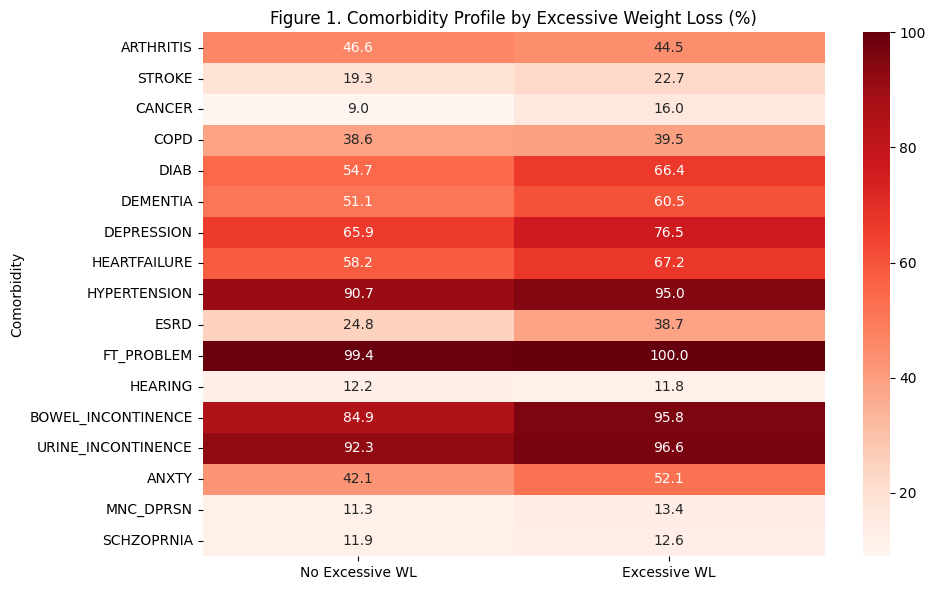

In [ ]:
import seaborn as sns
# Excessive weight loss indicator
summary_df2 = summary_df.copy()
summary_df2['Excessive_WL'] = (summary_df['Overall_WT_Change_Percent'] <= -0.10).astype(int)

# Mortality indicator
summary_df2['died'] = summary_df['BENE_DEATH_DT'].notna().astype(int)

# Obesity class
bmi_bins = [30, 35, 40, np.inf]
bmi_labels = ['Class I', 'Class II', 'Class III']
summary_df2['Obesity_Class'] = pd.cut(
    summary_df2['Initial_BMI'],
    bins=bmi_bins,
    labels=bmi_labels
)

illness_cols = [
    'ARTHRITIS','STROKE','CANCER','COPD','DIAB','DEMENTIA',
    'DEPRESSION','HEARTFAILURE','HYPERTENSION','ESRD',
    'FT_PROBLEM','HEARING','BOWEL_INCONTINENCE',
    'URINE_INCONTINENCE','ANXTY','MNC_DPRSN','SCHZOPRNIA'
]

heatmap_df = (
    summary_df2
    .groupby('Excessive_WL')[illness_cols]
    .mean()
    .rename(index={0: 'No Excessive WL', 1: 'Excessive WL'})
)


plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df.T * 100, annot=True, fmt=".1f", cmap="Reds")
plt.title("Figure 1. Comorbidity Profile by Excessive Weight Loss (%)")
plt.xlabel("")
plt.ylabel("Comorbidity")
plt.tight_layout()
# Save the figure into the Visualizations_and_Tables folder if needed
#plt.savefig('Visualizations_and_Tables/comorbidity_heatmap_wt_loss.png', dpi=300)
plt.show()



/var/folders/0y/mmp_lnms4tx1tvdz0cwsqdx40000gs/T/ipykernel_43981/2588245224.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Obesity_Class')[illness_cols]


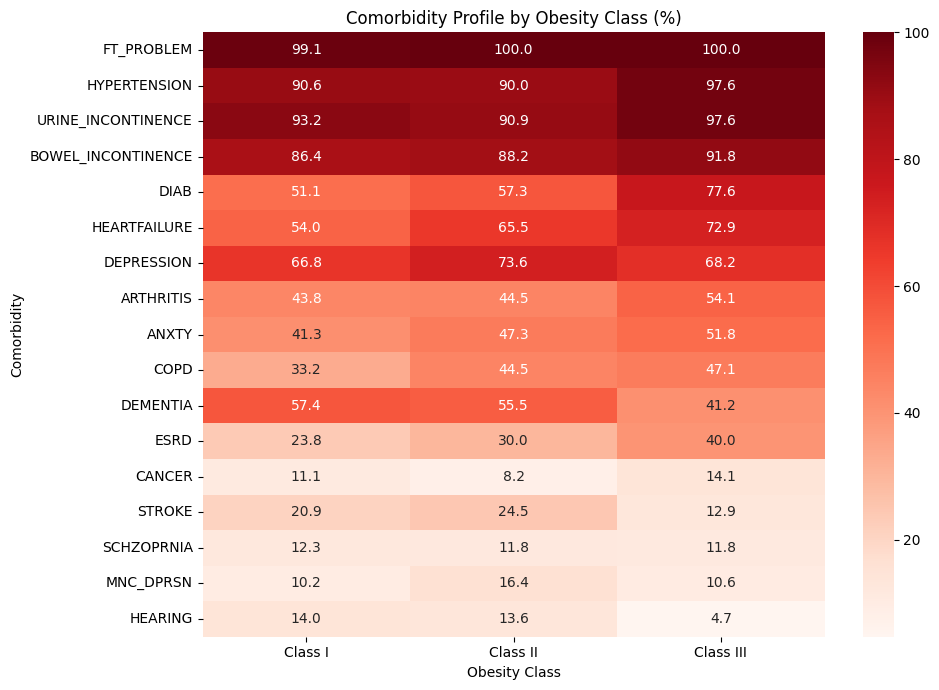

In [ ]:
# Keep only obesity classes (non-null)
hm_subset = summary_df2.loc[summary_df2['Obesity_Class'].notna()].copy()

# Make ordering explicit (important for heatmap row order)
hm_subset['Obesity_Class'] = pd.Categorical(
    hm_subset['Obesity_Class'],
    categories=['Class I', 'Class II', 'Class III'],
    ordered=True
)

heatmap_ob_df = (
    hm_subset
    .groupby('Obesity_Class')[illness_cols]
    .mean()
    .T
)

heatmap_ob_df = heatmap_ob_df.sort_values(by='Class III', ascending=False)


plt.figure(figsize=(10, 7))
sns.heatmap(
    heatmap_ob_df * 100,
    annot=True,
    fmt=".1f",
    cmap="Reds"
)
plt.title("Comorbidity Profile by Obesity Class (%)")
plt.xlabel("Obesity Class")
plt.ylabel("Comorbidity")
plt.tight_layout()
#save the figure into the Visualizations_and_Tables folder if needed
#plt.savefig('Visualizations_and_Tables/comorbidity_heatmap_obesity.png', dpi=150)
plt.show()



### Table listing the top comorbidities related to mortality in nursing home residents with obesity who had excessive weight loss, shows correlation and p-values as well

* Survived_%: Percentage of surviving residents who have each condition
* Died_%:  Percentage of residents who died who have each condition
* Difference: Difference between Survived_% and Died_%
* Correlation_r: Pearson correlation coefficient between condition and mortality, Positive = associated with higher mortality, Negative = associated with lower mortality/survival
* P_value: statistically significance of the correlation


In [9]:
# obese + excessive WL
subset = summary_df2[
    (summary_df2['Excessive_WL'] == 1) &
    (summary_df2['Obesity_Class'].notna())
].copy()

# Build ADL category indicators
subset['ADL_SCORE_INIT'] = pd.to_numeric(subset['ADL_SCORE_INIT'], errors='coerce')

subset['ADL_Impairment'] = pd.cut(
    subset['ADL_SCORE_INIT'],
    bins=[-np.inf, 12, 20, np.inf],
    labels=['Mild (0-12)', 'Moderate (13-20)', 'Severe (21-28)'] 
)

adl_levels = ['Mild (0-12)', 'Moderate (13-20)', 'Severe (21-28)']
for lvl in adl_levels:
    subset[f'ADL: {lvl}'] = (subset['ADL_Impairment'] == lvl).astype(int)

adl_indicator_cols = [f'ADL: {lvl}' for lvl in adl_levels]

# Build BIMS category indicators
# BIMS is already text categories
bims_levels = ["Cognitively intact", "Mildly impaired", "Moderately impaired", "Severely impaired"]
for lvl in bims_levels:
    subset[f'BIMS: {lvl}'] = (subset['Initial_BIMS'] == lvl).astype(int)

bims_indicator_cols = [f'BIMS: {lvl}' for lvl in bims_levels]

# Final variable list
vars_for_table = illness_cols + adl_indicator_cols + bims_indicator_cols

# (Optional but nice) keep ordering: comorbidities, then ADL, then BIMS
ordered_rows = illness_cols + adl_indicator_cols + bims_indicator_cols

# Mean by mortality group
mortality_tbl = (
    subset.groupby('died')[vars_for_table]
          .mean(numeric_only=True)
          .rename(index={0: 'Survived', 1: 'Died'})
          .T
)

# Ensure both columns exist even if one group is missing (rare but possible)
for col in ['Survived', 'Died']:
    if col not in mortality_tbl.columns:
        mortality_tbl[col] = np.nan

# Difference in percentage points (all rows are indicators now)
mortality_tbl['Difference_%'] = (mortality_tbl['Died'] - mortality_tbl['Survived']) * 100

# Correlation + p-value vs mortality
corrs, pvals = [], []
y = subset['died'].astype(float).values

for v in vars_for_table:
    x = pd.to_numeric(subset[v], errors='coerce').values
    mask = np.isfinite(x) & np.isfinite(y)

    if mask.sum() < 3 or np.nanstd(x[mask]) == 0:
        corrs.append(np.nan)
        pvals.append(np.nan)
    else:
        r, p = pearsonr(x[mask], y[mask])  # phi coefficient for binary-binary
        corrs.append(r)
        pvals.append(p)

mortality_tbl['Correlation_r'] = corrs
mortality_tbl['p_value'] = pvals

mortality_tbl['Survived_%'] = (mortality_tbl['Survived'] * 100).round(1)
mortality_tbl['Died_%'] = (mortality_tbl['Died'] * 100).round(1)
mortality_tbl['Difference_pp'] = mortality_tbl['Difference_%'].round(1)

# Reorder rows (optional)
mortality_tbl = mortality_tbl.reindex(ordered_rows)

# Sort within table: by absolute difference in percentage points (optional)
mortality_tbl = mortality_tbl.sort_values('Difference_%', key=lambda s: s.abs(), ascending=False)

# Final columns to show
final_cols = ['Survived_%', 'Died_%', 'Difference_pp', 'Correlation_r', 'p_value']

mortality_tbl[final_cols].sort_values(by='p_value')

#save the table into the Visualizations_and_Tables folder if needed
#mortality_tbl[final_cols].to_csv('Visualizations_and_Tables/mortality_comorbidity_table.csv')

died,Survived_%,Died_%,Difference_pp,Correlation_r,p_value
ESRD,22.5,46.8,24.3,0.236071,0.009747
ADL: Moderate (13-20),47.5,70.9,23.4,0.228846,0.012301
ADL: Mild (0-12),25.0,11.4,-13.6,-0.175488,0.056264
SCHZOPRNIA,20.0,8.9,-11.1,-0.158539,0.085049
DEMENTIA,50.0,65.8,15.8,0.152901,0.096889
HEARTFAILURE,57.5,72.2,14.7,0.147455,0.109526
STROKE,30.0,19.0,-11.0,-0.124211,0.178336
CANCER,10.0,19.0,9.0,0.115904,0.209387
BIMS: Moderately impaired,27.5,17.7,-9.8,-0.113392,0.219498
ADL: Severe (21-28),27.5,17.7,-9.8,-0.113392,0.219498


### Unilateral regression analysis of mortality

In [10]:
summary_df2 = summary_df2.copy()

summary_df2['INITIAL_AGE'] = pd.to_numeric(summary_df2['INITIAL_AGE'], errors='coerce')
summary_df2['ADL_SCORE_INIT'] = pd.to_numeric(summary_df2['ADL_SCORE_INIT'], errors='coerce')
summary_df2['Initial_BMI'] = pd.to_numeric(summary_df2['Initial_BMI'], errors='coerce')

# Comorbidities should already be 0/1 ints, but keep this safe:
summary_df2[illness_cols] = summary_df2[illness_cols].apply(pd.to_numeric, errors='coerce')

# Build categorical variables with requested baselines

# Obesity class baseline: Class I (assumes you already created Obesity_Class earlier)
summary_df2['Obesity_Class'] = pd.Categorical(
    summary_df2['Obesity_Class'],
    categories=['Class I', 'Class II', 'Class III'],
    ordered=True
)

# Age groups baseline: 65–74
# IMPORTANT: removed "<65" group completely (cleaned dataset has none; it caused singularity)
summary_df2['Age_Group'] = pd.cut(
    summary_df2['INITIAL_AGE'],
    bins=[64, 74, 84, 94, np.inf],
    labels=['65-74', '75-84', '85-94', '95+'],
    include_lowest=True
).astype('category')

# ADL impairment baseline: Mild (0–12)
summary_df2['ADL_Impairment'] = pd.cut(
    summary_df2['ADL_SCORE_INIT'],
    bins=[-np.inf, 12, 20, np.inf],
    labels=['Mild (0-12)', 'Moderate (13-20)', 'Severe (21+)']
)
summary_df2['ADL_Impairment'] = pd.Categorical(
    summary_df2['ADL_Impairment'],
    categories=['Mild (0-12)', 'Moderate (13-20)', 'Severe (21+)'],
    ordered=True
)

# Cognitive baseline: Cognitively intact
# Your Initial_BIMS is text: "Cognitively intact", "Mildly impaired", "Moderately impaired", "Severely impaired"
# Combine Mildly + Moderately => "Moderate impairment" to match your baseline list
cog_map = {
    "Cognitively intact": "Cognitively intact",
    "Mildly impaired": "Moderate impairment",
    "Moderately impaired": "Moderate impairment",
    "Severely impaired": "Severe impairment"
}
summary_df2['Cognitive_Status'] = summary_df2['Initial_BIMS'].map(cog_map)

summary_df2['Cognitive_Status'] = pd.Categorical(
    summary_df2['Cognitive_Status'],
    categories=['Cognitively intact', 'Moderate impairment', 'Severe impairment'],
    ordered=True
)

# Ensure these are categories for formula handling
summary_df2['GENDER'] = summary_df2['GENDER'].astype('category')
summary_df2['RACE'] = summary_df2['RACE'].astype('category')

# Build modeling dataset
model_cols = (
    ['died', 'Excessive_WL', 'Obesity_Class', 'Age_Group', 'GENDER', 'RACE',
     'ADL_Impairment', 'Cognitive_Status']
    + illness_cols
)

dfm = summary_df2[model_cols].dropna().copy()

# Drop any constant disease columns within dfm (extra safety)
const_cols = [c for c in illness_cols if dfm[c].nunique(dropna=False) <= 1]
illness_cols_final = [c for c in illness_cols if c not in const_cols]

print("Rows used in model:", dfm.shape[0])
print("Deaths / Survivors:", dfm['died'].value_counts().to_dict())
print("Dropped constant comorbidity cols (if any):", const_cols)

# Fit logistic regression
disease_terms = " + ".join(illness_cols_final)

formula = f"""
died ~ Excessive_WL
     + C(Obesity_Class, Treatment(reference='Class I'))
     + C(Age_Group, Treatment(reference='65-74'))
     + C(GENDER, Treatment(reference='Male'))
     + C(RACE, Treatment(reference='White'))
     + C(ADL_Impairment, Treatment(reference='Mild (0-12)'))
     + C(Cognitive_Status, Treatment(reference='Cognitively intact'))
     + {disease_terms}
"""

logit_model = smf.logit(formula=formula, data=dfm).fit(method="lbfgs", maxiter=500, disp=True)

# Odds ratios + 95% CI + p-values table
params = logit_model.params
conf = logit_model.conf_int()

or_table_unsorted = pd.DataFrame({
    "OR": np.exp(params),
    "CI_lower": np.exp(conf[0]),
    "CI_upper": np.exp(conf[1]),
    "p_value": logit_model.pvalues
})
# save or table unsorted into the Visualizations_and_Tables folder if needed
#or_table_unsorted.to_csv('Visualizations_and_Tables/logistic_regression_results_unsorted.csv')

or_table = pd.DataFrame({
    "OR": np.exp(params),
    "CI_lower": np.exp(conf[0]),
    "CI_upper": np.exp(conf[1]),
    "p_value": logit_model.pvalues
}).sort_values("p_value")

or_table
logit_model.summary()

# save the or table into the Visualizations_and_Tables folder if needed
# or_table.to_csv('Visualizations_and_Tables/logistic_regression_results.csv')



Rows used in model: 417
Deaths / Survivors: {0: 211, 1: 206}
Dropped constant comorbidity cols (if any): []


/Users/Thebigkab00m/miniforge3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/Thebigkab00m/miniforge3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   died   No. Observations:                  417
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                           32
Date:                Thu, 19 Feb 2026   Pseudo R-squ.:                  0.1943
Time:                        03:19:59   Log-Likelihood:                -232.85
converged:                       True   LL-Null:                       -289.01
Covariance Type:            nonrobust   LLR p-value:                 7.327e-11
=========================================================================================================================================================
                                                                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                 9.5613    390.906      0.024      0.980    -756.601     775.723
C(Obesity_Class, Treatment(reference='Class I'))[T.Class II]                             -0.0696      0.278     -0.250      0.802      -0.615       0.476
C(Obesity_Class, Treatment(reference='Class I'))[T.Class III]                            -0.2975      0.319     -0.932      0.351      -0.923       0.328
C(Age_Group, Treatment(reference='65-74'))[T.75-84]                                       0.6967      0.275      2.535      0.011       0.158       1.235
C(Age_Group, Treatment(reference='65-74'))[T.85-94]                                       1.1789      0.342      3.444      0.001       0.508       1.850
C(Age_Group, Treatment(reference='65-74'))[T.95+]                                         3.1799      1.270      2.503      0.012       0.690       5.670
C(GENDER, Treatment(reference='Male'))[T.Female]                                         -0.6865      0.264     -2.599      0.009      -1.204      -0.169
C(RACE, Treatment(reference='White'))[T.Asian]                                            0.0007      1.530      0.000      1.000      -2.998       2.999
C(RACE, Treatment(reference='White'))[T.Black]                                           -0.3240      0.325     -0.997      0.319      -0.961       0.313
C(RACE, Treatment(reference='White'))[T.Hispanic]                                        -0.4051      0.515     -0.787      0.432      -1.414       0.604
C(RACE, Treatment(reference='White'))[T.Missing]                                         -0.6115      0.974     -0.628      0.530      -2.521       1.298
C(ADL_Impairment, Treatment(reference='Mild (0-12)'))[T.Moderate (13-20)]                 0.3131      0.299      1.046      0.296      -0.274       0.900
C(ADL_Impairment, Treatment(reference='Mild (0-12)'))[T.Severe (21+)]                     0.6301      0.385      1.635      0.102      -0.125       1.385
C(Cognitive_Status, Treatment(reference='Cognitively intact'))[T.Moderate impairment]     0.3008      0.276      1.088      0.277      -0.241       0.843
C(Cognitive_Status, Treatment(reference='Cognitively intact'))[T.Severe impairment]       0.6168      0.368      1.674      0.094      -0.105       1.339
Excessive_WL                                                                              0.8448      0.270      3.132      0.002       0.316       1.373
ARTHRITIS                                                                                -0.6676      0.242     -2.755      0.006      -1.143      -0.193
STROKE                                                                                   -0.3491      0.307     -1.139      0.255      -0.950       0.252
CANCER 

## Combination Table

In [11]:
from itertools import combinations

# Setup

illness_cols = [
    'ARTHRITIS', 'STROKE', 'CANCER', 'COPD', 'DIAB', 'DEMENTIA',
    'DEPRESSION', 'HEARTFAILURE', 'HYPERTENSION', 'ESRD',
    'FT_PROBLEM', 'HEARING', 'BOWEL_INCONTINENCE', 'URINE_INCONTINENCE',
    'ANXTY', 'MNC_DPRSN', 'SCHZOPRNIA'
]

# Friendly display names for each column
illness_labels = {
    'ARTHRITIS':          'Arthritis',
    'STROKE':             'Stroke',
    'CANCER':             'Cancer',
    'COPD':               'COPD',
    'DIAB':               'Diabetes',
    'DEMENTIA':           'Dementia',
    'DEPRESSION':         'Depression',
    'HEARTFAILURE':       'Heart Failure',
    'HYPERTENSION':       'Hypertension',
    'ESRD':               'End-Stage Renal Disease',
    'FT_PROBLEM':         'Fall History',
    'HEARING':            'Hearing Impairment',
    'BOWEL_INCONTINENCE': 'Bowel Incontinence',
    'URINE_INCONTINENCE': 'Urinary Incontinence',
    'ANXTY':              'Anxiety',
    'MNC_DPRSN':          'Manic Depression',
    'SCHZOPRNIA':         'Schizophrenia',
}

# Split into deceased vs survivors
deceased_df  = summary_df[summary_df['BENE_DEATH_DT'].notna()].copy()
survivor_df  = summary_df[summary_df['BENE_DEATH_DT'].isna()].copy()
n_deceased   = len(deceased_df)
n_survivors  = len(survivor_df)


# Helper: top-N combinations of a given size

def top_combos(df, n_patients, combo_size, top_n=5):
    """
    Returns a list of (label_string, count, prevalence_pct) tuples
    for the most common combinations of exactly `combo_size` conditions.
    Only patients who have ALL conditions in the combo are counted.
    """
    cols = [c for c in illness_cols if c in df.columns]
    counts = {}
    for combo in combinations(cols, combo_size):
        # Patient must have every condition in the combo (value == 1)
        mask = (df[list(combo)] == 1).all(axis=1)
        n = mask.sum()
        if n > 0:
            label = ' + '.join(illness_labels[c] for c in combo)
            counts[label] = n

    # Sort descending, take top_n
    sorted_combos = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:top_n]

    # Pad to exactly top_n rows so the table always has 5 rows per section
    while len(sorted_combos) < top_n:
        sorted_combos.append(('—', 0))

    return [
        (label, n, f"{n / n_patients * 100:.1f}%" if n > 0 else '—')
        for label, n in sorted_combos
    ]


# Build table rows

def build_combo_table(top_n=5):
    rows = []

    for combo_size, section_label in [
        (1, 'Top 5 conditions: single condition'),
        (2, 'Top 5 combinations: 2 conditions'),
        (3, 'Top 5 combinations: 3 conditions'),
        (4, 'Top 5 combinations: 4 conditions'),
    ]:
        dec_results  = top_combos(deceased_df, n_deceased,  combo_size, top_n)
        surv_results = top_combos(survivor_df, n_survivors, combo_size, top_n)

        # Section header row
        rows.append({
            '':                   section_label,
            'Deceased':           '',
            'Prevalence (%) ':    '',     # deceased prevalence col
            'Survivors':          '',
            'Prevalence (%)  ':   '',     # survivor prevalence col
        })

        for i in range(top_n):
            dec_label,  dec_n,  dec_pct  = dec_results[i]
            surv_label, surv_n, surv_pct = surv_results[i]
            rows.append({
                '':                  '',
                'Deceased':          f"{dec_label}  (n={dec_n})"  if dec_n > 0 else '—',
                'Prevalence (%) ':   dec_pct,
                'Survivors':         f"{surv_label}  (n={surv_n})" if surv_n > 0 else '—',
                'Prevalence (%)  ':  surv_pct,
            })

    return pd.DataFrame(rows, columns=['', 'Deceased', 'Prevalence (%) ', 'Survivors', 'Prevalence (%)  '])


combo_table = build_combo_table()
display(combo_table)
combo_table.to_csv('Visualizations_and_Tables/combo_table.csv')


,,Deceased,Prevalence (%),Survivors,Prevalence (%)
0,Top 5 conditions: single condition,,,,
1,,Fall History (n=211),99.1%,Fall History (n=217),100.0%
2,,Urinary Incontinence (n=202),94.8%,Urinary Incontinence (n=200),92.2%
3,,Hypertension (n=199),93.4%,Hypertension (n=196),90.3%
4,,Bowel Incontinence (n=194),91.1%,Bowel Incontinence (n=184),84.8%
5,,Depression (n=150),70.4%,Depression (n=146),67.3%
6,Top 5 combinations: 2 conditions,,,,
7,,Fall History + Urinary Incontinence (n=200),93.9%,Fall History + Urinary Incontinence (n=200),92.2%
8,,Hypertension + Fall History (n=197),92.5%,Hypertension + Fall History (n=196),90.3%
9,,Fall History + Bowel Incontinence (n=192),90.1%,Fall History + Bowel Incontinence (n=184),84.8%
